In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


# Data Cleaning

some issues to check
- outliers
- missing values
- duplicates
- false datatype
- inconsistent user input


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


#### No false datatypes

# Dealing With Missing Values

In [5]:
# Checking for NaNs
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

# We noticed 28 null-containing records that most of them (26) belong to id 3511355 body , 1 for 2010 CJ188 and 1 for (2010 AW108)

In [6]:
# accessing the null-containing records in the DF
df.loc[df['absolute_magnitude'].isna(),:]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
107508,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,69599.619497,4.163668e+07,False
111671,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,48866.251824,5.876855e+07,False
114171,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,50912.941751,7.713979e+06,False
116688,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,80266.699067,6.088422e+07,False
146059,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,70193.252023,4.273236e+07,False
148836,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,49737.645508,2.537158e+07,False
150446,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,49134.581521,5.965592e+07,False
153108,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,50646.135198,7.584209e+06,False
155973,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,79709.497213,5.997446e+07,False
186857,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,71005.133933,4.413829e+07,False


# ID 3511355 body (2010_DJ77) NaN issue 
All of the records regarding the body with id 3511355 has null values so trying to impute it with values of random bodies won't make sense as we can't identify any other similar bodies to it from the remaining not null features(relative velocity and missed distance) also all of its records (26 out 338199) of are not hazardous so we can discard its records safely without the risk of being hazardous to earth 

In [7]:
df_2010_DJ77 = df.loc[df['name'] == '(2010 DJ77)',:]

In [8]:
df_2010_DJ77.index

Index([107508, 111671, 114171, 116688, 146059, 148836, 150446, 153108, 155973,
       186857, 190088, 191131, 193826, 196653, 229245, 232115, 233881, 236808,
       240067, 271995, 274580, 276052, 278825, 281674, 328006, 334417],
      dtype='int64')

In [9]:
df = df.drop(index = df_2010_DJ77.index)

# (2010 AW108) / (2010 CJ188) nan issue
same goes for these 2 bodies as each one contain only one record so no other similaer records or bodies to impute thier nan values from also they are non hazardous so we can discard them

In [10]:
df.loc[df['name'] == '(2010 AW108)',:]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
274352,3592397,(2010 AW108),NaN,NaN,NaN,Earth,22559.617403,5.149683e+07,False


In [11]:
df.loc[df['name'] == '(2010 CJ188)',:]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
274626,54049909,(2010 CJ188),NaN,NaN,NaN,Earth,61048.333919,4.631794e+07,False


In [12]:
df.dropna(inplace = True)

In [13]:
# ALL NaN gone
df.isna().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# Dealing with Duplicates

In [14]:
df.duplicated().sum()

0

no duplicates

In [15]:
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


# Checking for inconsistent user input

In [16]:
df['is_hazardous'].unique()

array([False,  True])

In [17]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

# EDA

## Checking for outliers

In [18]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


##### from the df describtion, we see that almost all numeric features contain outliers, so we nedd to visulaize thier distribution 

# visualizing features distributions

In [19]:
numeric_features = list(df.select_dtypes(exclude = ['object','bool']).columns)
numeric_features.remove('neo_id')
print(numeric_features)

['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']


In [20]:
df_melted = df[numeric_features].melt(var_name='Features', value_name='Values')

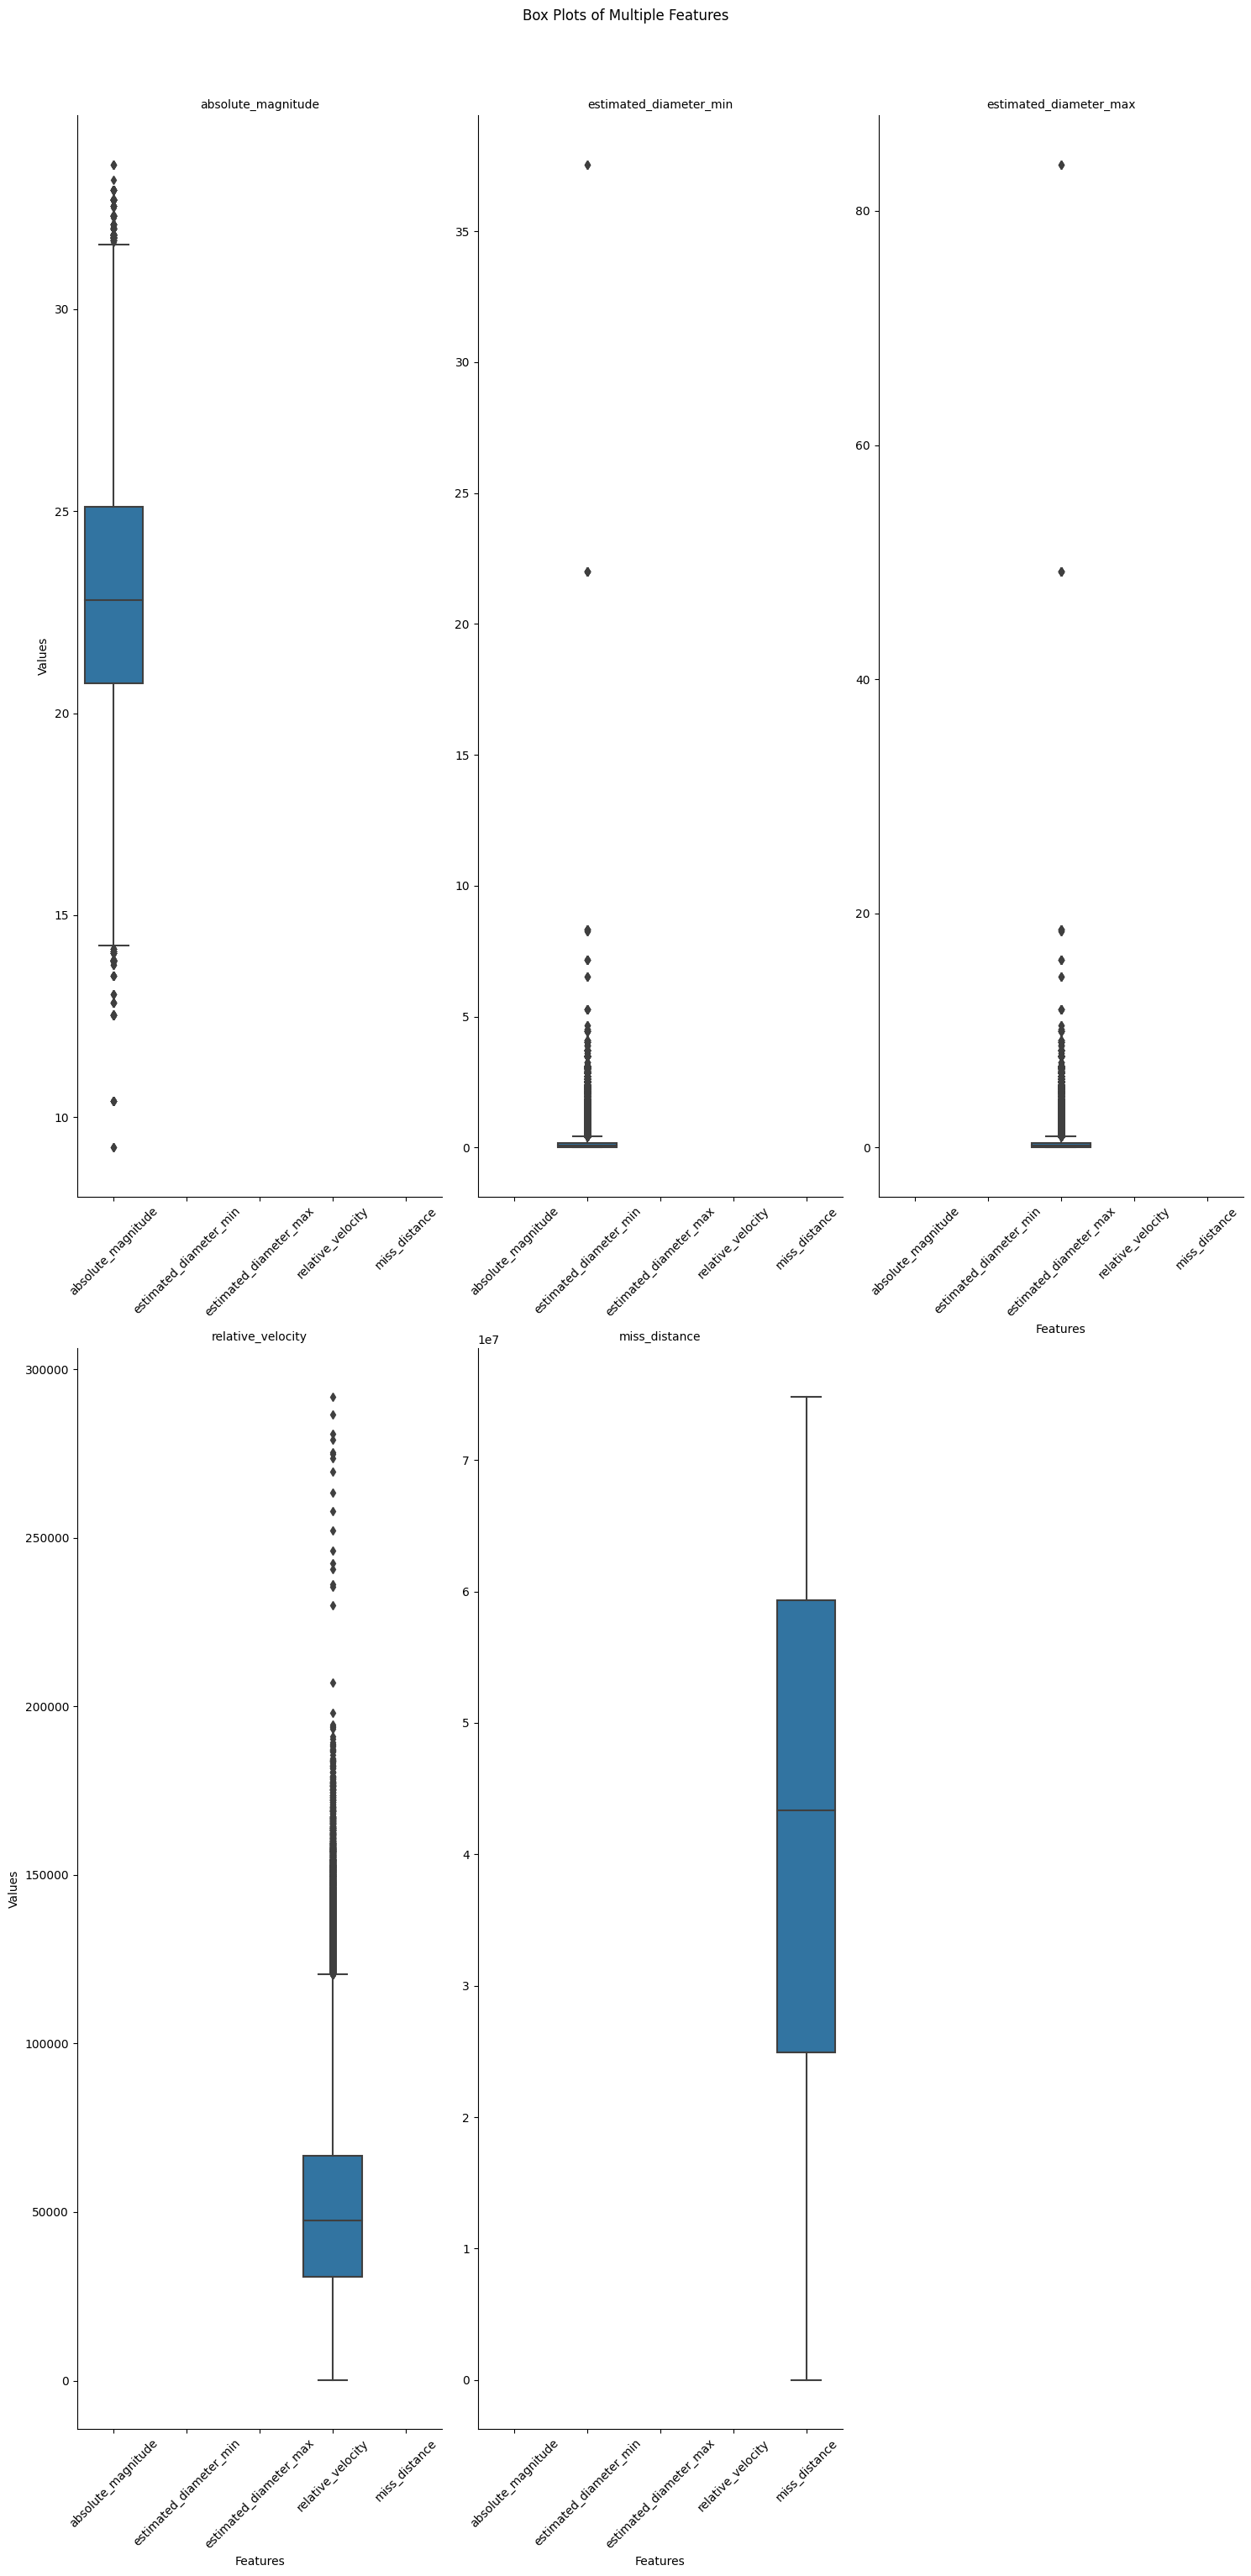

In [21]:
g = sns.FacetGrid(df_melted, col="Features", col_wrap=3, sharex=False, sharey=False, height=10, aspect = 2)

# Map the boxplot to each grid
g.map(sns.boxplot, "Features", "Values", order=df_melted['Features'].unique())
g.fig.set_size_inches(15, 30) 
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
# Adjust the titles and layout
g.set_titles("{col_name}")
g.fig.suptitle('Box Plots of Multiple Features', y=1.02)
g.fig.tight_layout()
g
plt.show()

# box-plot analysis:
##### Erros VS Extreme values: there are columns contain significat number of outliers, but they might be either a sensor error or an extreme but valid values and in my opinion the chances of being sensor error is pretty small as these dataset is gathered through NASA's sensors which sould be pretty accurate also removing outliers depends on the model we use is senstive to outliers like logistic regression or not like random forest
 
##### nature of the analysis: it also depends on whether we need to analysis the behavior of common bodies out there so we can ignore very extreme bodies or we need to focus on those outliers and study them. 

##### size of the dataset: since our dataset is pretty huge outliers impact is reduced in some manner

## Outlier Detecting function

In [22]:

def IQR(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    higher_bound = Q3 + (1.5 * IQR)
    outliers_condition = np.logical_or(df[column] < lower_bound, df[column] > higher_bound)
    non_outliers_condition = np.logical_and(df[column] > lower_bound, df[column] < higher_bound)
    return outliers_condition, non_outliers_condition

In [23]:
# example : estimate_diameter_max outliers
out,non_out = IQR(df,'relative_velocity')
df.loc[out,'is_hazardous'].value_counts()

is_hazardous
False    3738
True     1710
Name: count, dtype: int64

## some visualizations

##### what are the top 10 objects based on thier relative vel  

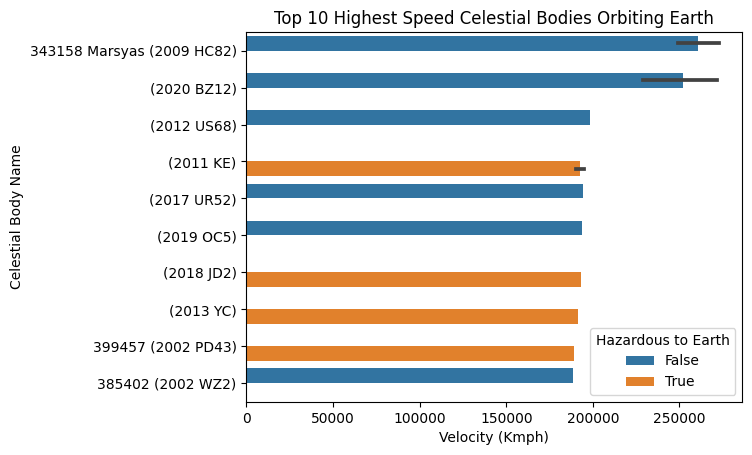

In [24]:
sns.barplot(orient = 'h',data = df.sort_values(by='relative_velocity', ascending = False).head(27), y = 'name',x = 'relative_velocity', hue = 'is_hazardous')
plt.title('Top 10 Highest Speed Celestial Bodies Orbiting Earth')
plt.ylabel('Celestial Body Name')
plt.xlabel('Velocity (Kmph)')
plt.legend(title='Hazardous to Earth')

##### the correlation between relatice_velocity of the object and its missed distance from earth based on it is hazardous or not (10000 random sample)

Text(39.93105869020062, 0.5, 'Missed Distance')

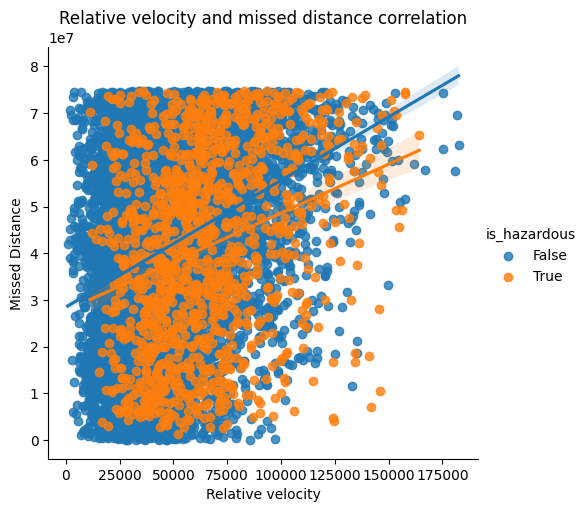

In [25]:
sns.lmplot(data = df.sample(10000), x = 'relative_velocity', y = 'miss_distance', hue = 'is_hazardous')
plt.title('Relative velocity and missed distance correlation')
plt.xlabel('Relative velocity')
plt.ylabel('Missed Distance')


##### what are the 10 closest threatning objects to earth

Text(0.5, 0, 'Missed Distance (KM)')

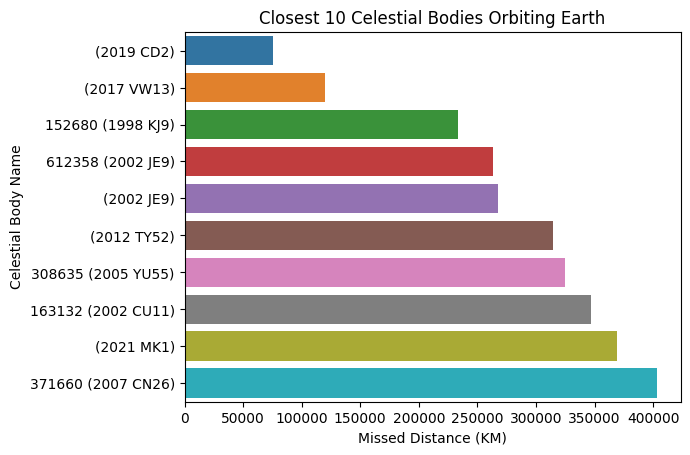

In [26]:

sns.barplot(orient = 'h', data = df[df['is_hazardous'] == True].sort_values(by = 'miss_distance').head(10), y = 'name', x='miss_distance')
plt.title('Closest 10 Celestial Bodies Orbiting Earth')
plt.ylabel('Celestial Body Name')
plt.xlabel('Missed Distance (KM)')


##### How is Hazardousness bodies distributed based on thier intiristic luminosty

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='is_hazardous', ylabel='absolute_magnitude'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 51.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


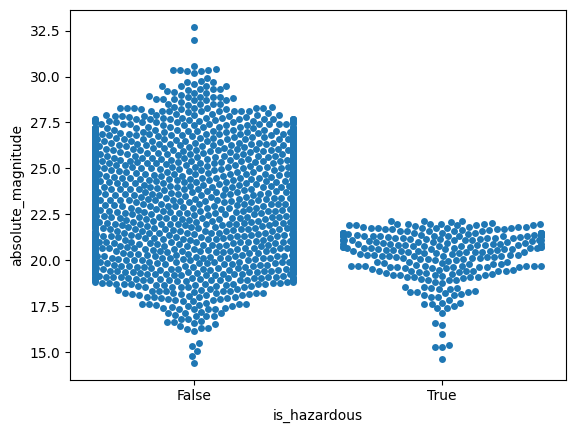

In [27]:
sns.swarmplot(data = df.sample(2000), x = 'is_hazardous', y= 'absolute_magnitude')

##### The most common Bodies estimated maximum diameter distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='estimated_diameter_max', ylabel='Count'>

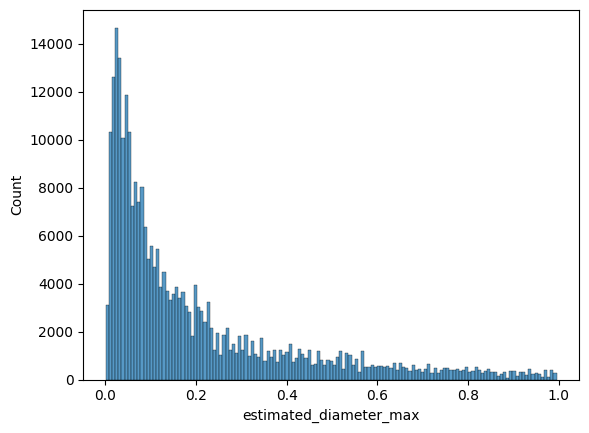

In [28]:
# Non-threatening bodies
sns.histplot(data = df.loc[(df['estimated_diameter_max'] <= 1) & (df['is_hazardous'] == False),:], x = 'estimated_diameter_max')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='estimated_diameter_max', ylabel='Count'>

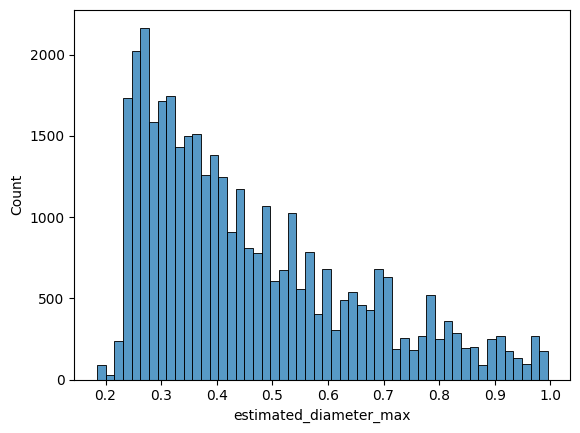

In [29]:
# Threatening bodies
sns.histplot(data = df.loc[(df['estimated_diameter_max'] <= 1) & (df['is_hazardous'] == True),:], x = 'estimated_diameter_max',)

##### How is Bodies distributed based on their intrinsic luminosity

/tmp/ipykernel_36/3322126418.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'absolute_magnitude', hue = 'is_hazardous', shade = True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='absolute_magnitude', ylabel='Density'>

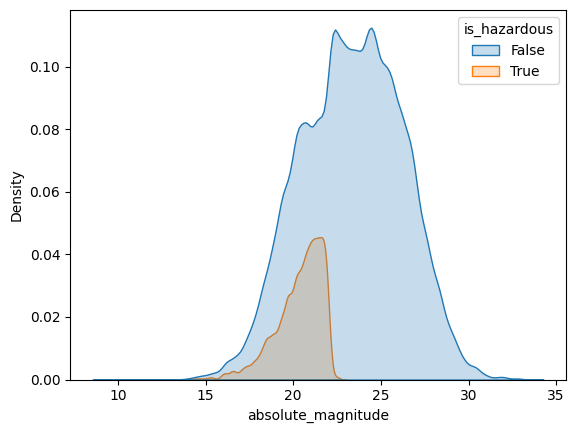

In [30]:
sns.kdeplot(data = df, x = 'absolute_magnitude', hue = 'is_hazardous', shade = True)

##### Least 10 intiristic luminosty threatening bodies orbiting Earth

Text(0, 0.5, 'Celestial body name')

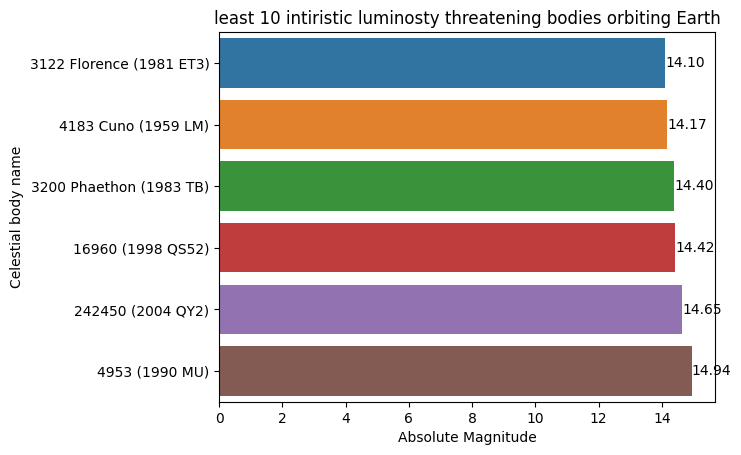

In [31]:
bar_plot = sns.barplot(orient = 'h', data = df.loc[df['is_hazardous'] == True,:].sort_values(by = 'absolute_magnitude', ascending = True).head(92), x = 'absolute_magnitude', y = 'name')
for bar in bar_plot.containers:
    bar_plot.bar_label(bar, fmt='%.2f', label_type='edge')
plt.title('least 10 intiristic luminosty threatening bodies orbiting Earth')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Celestial body name')

#### Features linear relationships between each other and with target feature

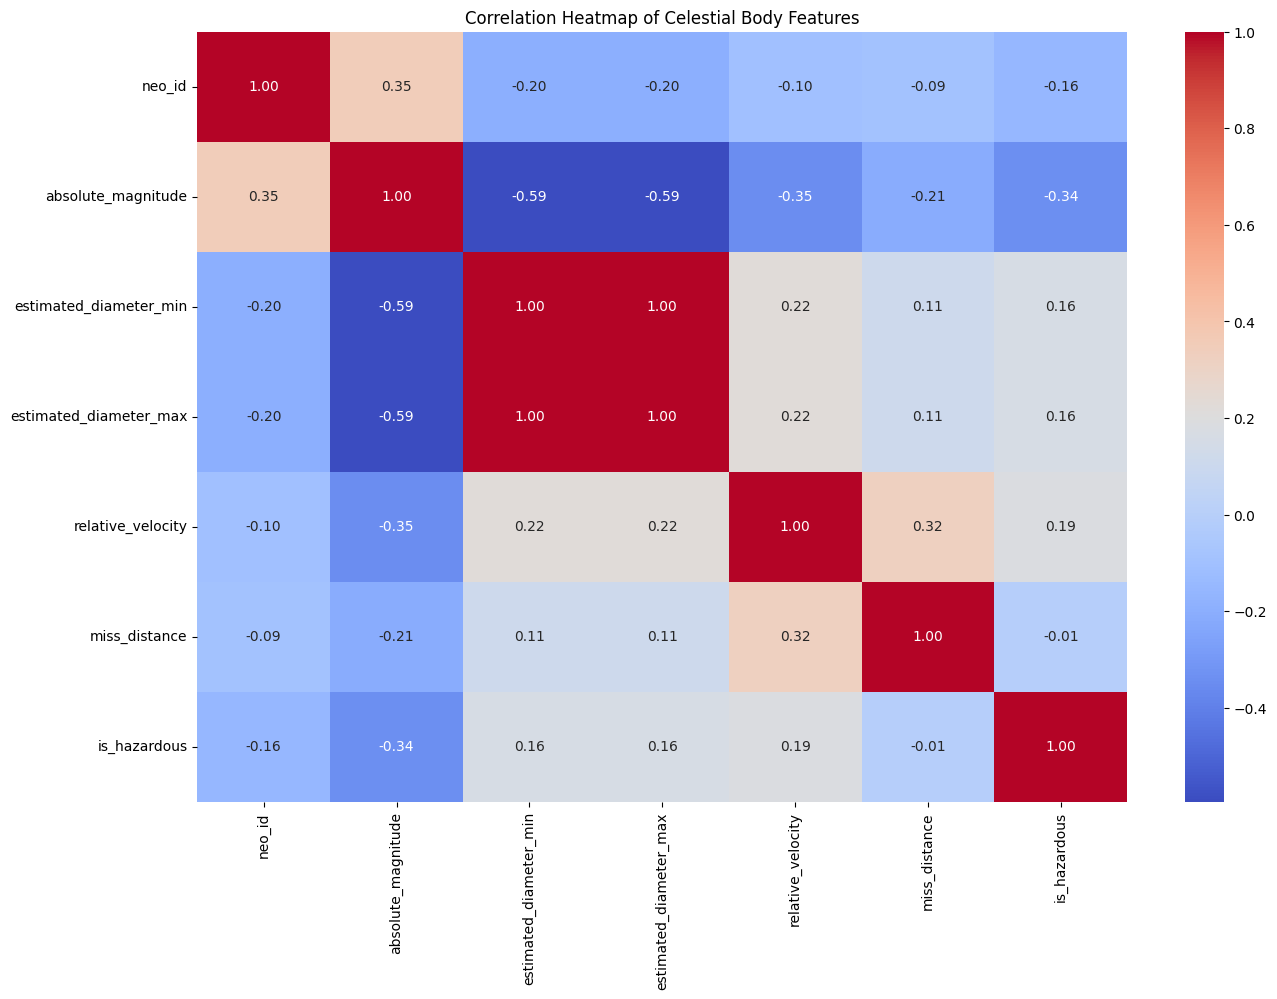

In [32]:
plt.figure(figsize=(15, 10))
numeric_features = list(df.select_dtypes(exclude = 'object'))
correlation_matrix = df[numeric_features].corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Celestial Body Features')
plt.show()

### Some Feature engineering:
we could create another feature out of diameter_min and diameter_max to represent the average recorded diameter of the body

In [33]:

df['average_estimated_diameter'] = (df['estimated_diameter_min'] + df['estimated_diameter_max'])/2

In [34]:
# target encoding
df['is_hazardous'] = df['is_hazardous'].apply(int)

In [35]:
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,average_estimated_diameter
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0,0.639061
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1,0.858109
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0,0.220568
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0,0.321768
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0,0.124035
...,...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,0,0.008271
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,0,0.007862
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,0,0.177723
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,0,0.071803


In [36]:
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,average_estimated_diameter
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0,0.639061
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1,0.858109
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0,0.220568
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0,0.321768
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0,0.124035
...,...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,0,0.008271
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,0,0.007862
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,0,0.177723
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,0,0.071803


# Model Training

# Logistic regression

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
scaler = StandardScaler()
logreg_balanced = LogisticRegression(class_weight = 'balanced')
logreg = LogisticRegression()

# Logistic regression with class weights and reduced outliers
this way we are intersted in common bodies, so we will drop outliers in relative_velocity,estimated_diameter_max and absolute_magnitude columns but only outliers with label 'False' to avoid losing more record of the minorty class 

In [38]:
X_without_outlier = df.copy()
for colname in X_without_outlier.select_dtypes('object'):
    X_without_outlier[colname],_ = X_without_outlier[colname].factorize()


In [39]:
X_without_outlier.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous', 'average_estimated_diameter'],
      dtype='object')

In [40]:
# dropping relative_velocity outliers with label 0

out,non_out = IQR(X_without_outlier,'relative_velocity')
indicies_todrop = X_without_outlier.loc[(out) & (X_without_outlier['is_hazardous'] == 0),:].index
X_without_outlier = X_without_outlier.drop(labels = indicies_todrop)

In [41]:
# dropping absolute_magnitude outliers with label 0
out,non_out = IQR(X_without_outlier,'absolute_magnitude')
indicies_todrop = X_without_outlier.loc[(out) & (X_without_outlier['is_hazardous'] == 0),:].index
X_without_outlier = X_without_outlier.drop(labels = indicies_todrop)

In [42]:
# dropping estimated_diameter_max outliers with label 0
out,non_out = IQR(X_without_outlier,'estimated_diameter_max')
indicies_todrop = X_without_outlier.loc[(out) & (X_without_outlier['is_hazardous'] == 0),:].index
X_without_outlier = X_without_outlier.drop(labels = indicies_todrop)

In [43]:
X_without_outlier

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,average_estimated_diameter
0,2162117,0,19.140,0.394962,0.883161,0,71745.401048,5.814362e+07,0,0.639061
1,2349507,1,18.500,0.530341,1.185878,0,109949.757148,5.580105e+07,1,0.858109
2,2455415,2,21.450,0.136319,0.304818,0,24865.506798,6.720689e+07,0,0.220568
3,3132126,3,20.630,0.198863,0.444672,0,78890.076805,3.039644e+07,0,0.321768
4,3557844,4,22.700,0.076658,0.171412,0,56036.519484,6.311863e+07,0,0.124035
...,...,...,...,...,...,...,...,...,...,...
338194,54403809,4793,28.580,0.005112,0.011430,0,56646.985988,6.406548e+07,0,0.008271
338195,54415298,17619,28.690,0.004859,0.010865,0,21130.768947,2.948883e+07,0,0.007862
338196,54454871,1151,21.919,0.109839,0.245607,0,11832.041031,5.346078e+07,0,0.177723
338197,54456245,33510,23.887,0.044377,0.099229,0,56198.382733,5.184742e+06,0,0.071803


In [44]:
y = X_without_outlier.pop('is_hazardous')

X_train, X_test, y_train, y_test = train_test_split(X_without_outlier,y,test_size=0.25, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
scaler = StandardScaler()
logreg_balanced = LogisticRegression(class_weight = 'balanced')
logreg_balanced.fit(X_train_scaled,y_train)
y_pred = logreg_balanced.predict(X_test_scaled)
print(classification_report(y_test,y_pred,target_names = ['False','True']))

              precision    recall  f1-score   support

       False       0.98      0.77      0.86     68024
        True       0.38      0.89      0.54     10789

    accuracy                           0.79     78813
   macro avg       0.68      0.83      0.70     78813
weighted avg       0.90      0.79      0.82     78813



Text(0.5, 427.9555555555555, 'Predicted label')

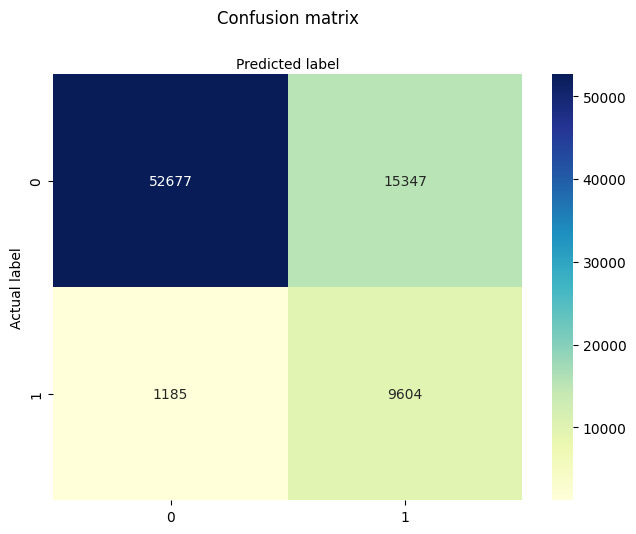

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[False,True] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Results:
we got improved version oof logisitic regerssion with overall accuracy 0.79, precision and recall of 0.38 and 0.89 respectively

# Logisitic Regression with outliers

In [47]:
scaler = StandardScaler()
logreg = LogisticRegression()
X = df.copy()
y = X.pop('is_hazardous')
for colname in X.select_dtypes(['object']):
    X[colname],_ = X[colname].factorize()
    

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [48]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

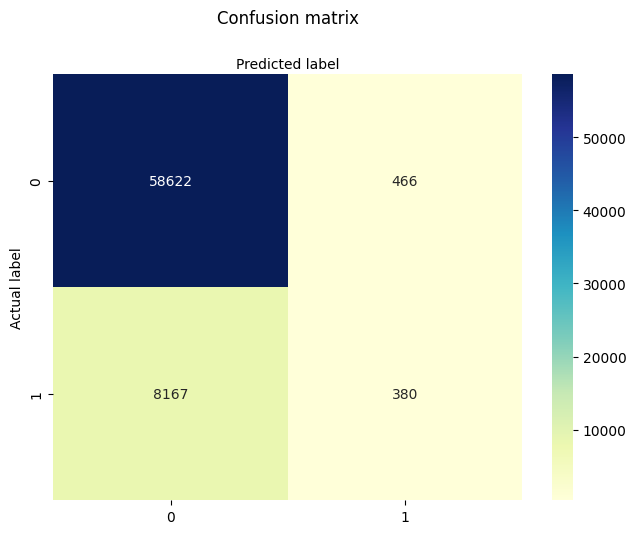

In [50]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[False,True] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [51]:
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59088
        True       0.45      0.04      0.08      8547

    accuracy                           0.87     67635
   macro avg       0.66      0.52      0.51     67635
weighted avg       0.82      0.87      0.82     67635



# Logisitic regression with feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

scaler = StandardScaler()
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)



In [53]:
logreg.fit(X_train_standard,y_train)

LogisticRegression()

In [54]:
y_pred = logreg.predict(X_test_standard)

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[58149,   939],
       [ 7814,   733]])

Text(0.5, 427.9555555555555, 'Predicted label')

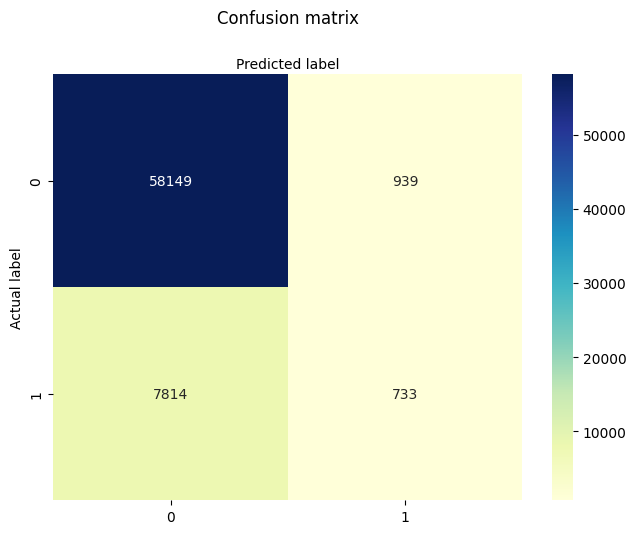

In [56]:

class_names=[False,True] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [57]:
from sklearn.metrics import classification_report
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.88      0.98      0.93     59088
        True       0.44      0.09      0.14      8547

    accuracy                           0.87     67635
   macro avg       0.66      0.53      0.54     67635
weighted avg       0.83      0.87      0.83     67635



notice the number of TP has increaased with scaling means model has improved but still has poor performance on True label in which we are interested

# class weight trial
as we have imbalanced dataset with 87% of data is False and 13% only is true , we need to mitigate this imbalance using class weighted logistic regression / oversample 'True' class with smote / lower the threshold to make logistic regression more sensetive to the minorty class

In [98]:
logreg_balanced = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [99]:
logreg_balanced.fit(X_train_standard,y_train)

LogisticRegression(class_weight='balanced')

In [100]:
y_pred = logreg_balanced.predict(X_test_standard)

Text(0.5, 427.9555555555555, 'Predicted label')

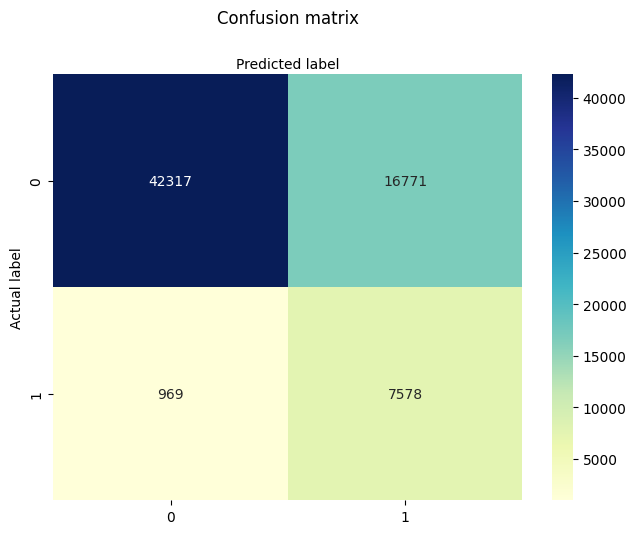

In [101]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[False,True] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
from sklearn.metrics import classification_report
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.98      0.72      0.83     59088
        True       0.31      0.89      0.46      8547

    accuracy                           0.74     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.89      0.74      0.78     67635



using class weights has improved TP a lot which is great but we sacrificed the FP to be larger number from 1000 to 16000 isn't something to just ignore it , so we need to try another approach with logistic regression

ROC AUC Score: 0.84


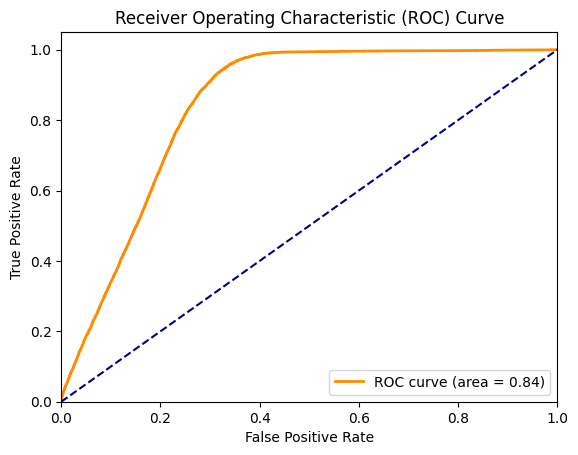

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = logreg_balanced.predict_proba(X_test_standard)[:, 1]  # Get the probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line representing a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SMOTE trial

In [63]:
!pip install imbalanced-learn


In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_standard, y_train)
len(X_train_resampled)


471842

In [65]:
logreg.fit(X_train_resampled,y_train_resampled)
y_pred = logreg.predict(X_test_standard)

Text(0.5, 427.9555555555555, 'Predicted label')

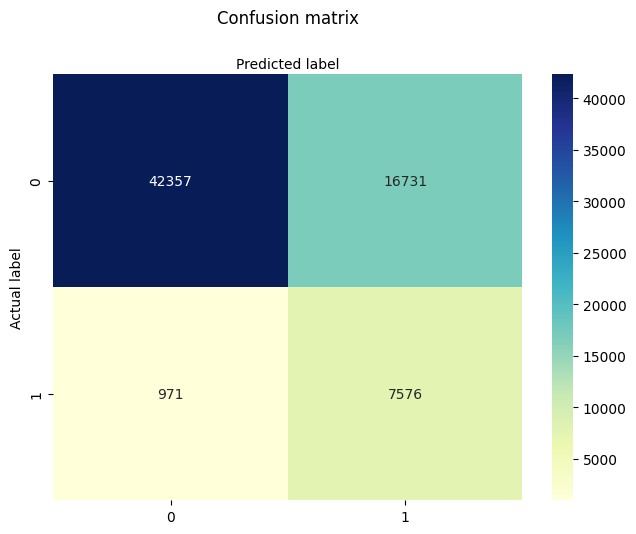

In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['F','T'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



we got similar results with SMOTE 

In [67]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(logreg_balanced, X_train_standard, y_train, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.2f}")
print(f"Cross-Validation Scores: {cv_scores}")


Average Cross-Validation Accuracy: 0.74
Cross-Validation Scores: [0.74070378 0.73700261 0.73975641 0.73888776 0.73862901]


# Logistic regression Evaluation

In [68]:
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.98      0.72      0.83     59088
        True       0.31      0.89      0.46      8547

    accuracy                           0.74     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.89      0.74      0.78     67635



# we need to try to remove some unuseful columns before training the model
1. removing based on Mutual Information
2. removing based on intiution

# Mutual information for subsetting the features

In [69]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


In [70]:
discrete_features = list(X.select_dtypes(int).columns)
discrete_features = X.dtypes == int

In [71]:
def MI(X,y):
    mi_scores = mutual_info_classif(X,y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores , name = 'MI Scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores = MI(X,y)
mi_scores

neo_id                        0.381863
name                          0.381863
estimated_diameter_min        0.151550
absolute_magnitude            0.151405
average_estimated_diameter    0.151152
estimated_diameter_max        0.150480
relative_velocity             0.024937
miss_distance                 0.006480
orbiting_body                 0.000000
Name: MI Scores, dtype: float64

# Based on MI:
we can remove orbiting_body:(which is reasonable as all of the rows has the same value for this column(Earth) so it doesn't give any info about the target),
miss_distance:which is quite suspisious as it represents the ddistance between the body and Earth in my opinion it is an important feature to determine it is dangerous or not but we will go with it  
relative velocity also has low mi so it can be removed

BUT, surprisingly neo_id and name got the highest MI score which is also very surprising in my opinion as how a piece of information like the body's name or id would help detect it is dangerous or not so there might be sort of hidden relationship here

In [72]:
X_subset = X[['neo_id','name','average_estimated_diameter','estimated_diameter_max','estimated_diameter_min','absolute_magnitude']]
X_train, X_test, y_train, y_test = train_test_split(X_subset,y,test_size = 0.25, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg_balanced = LogisticRegression(class_weight = 'balanced')


In [73]:
logreg_balanced.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

In [74]:
y_pred = logreg_balanced.predict(X_test_scaled)


Text(0.5, 427.9555555555555, 'Predicted label')

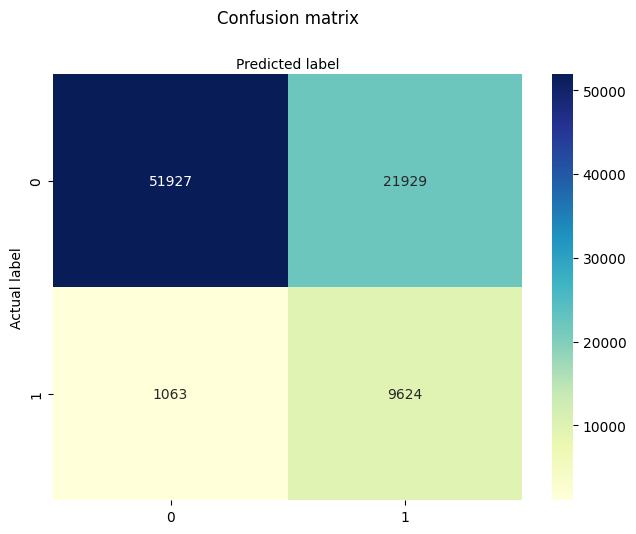

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=['F','T'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.98      0.70      0.82     73856
        True       0.31      0.90      0.46     10687

    accuracy                           0.73     84543
   macro avg       0.64      0.80      0.64     84543
weighted avg       0.89      0.73      0.77     84543



### when we removed the least MI score three columns our model didn't improve much it is same as before removing them , so it looks like we reached the limit of Logisitic regression with 0.9 recall for true label(which we care about) and overall accuracy of 0.73

# Based on intution

In [77]:
X = df.copy()
y = X.pop('is_hazardous')
for colname in X.select_dtypes(['object']):
    X[colname],_ = X[colname].factorize()
X_subset = X[['average_estimated_diameter','estimated_diameter_max','estimated_diameter_min','absolute_magnitude','miss_distance','relative_velocity']]
X_train, X_test, y_train, y_test = train_test_split(X_subset,y,test_size = 0.25, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg_balanced = LogisticRegression(class_weight = 'balanced')

In [78]:
logreg_balanced.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

In [79]:
y_pred = logreg_balanced.predict(X_test_scaled)
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.98      0.71      0.82     73856
        True       0.31      0.88      0.46     10687

    accuracy                           0.73     84543
   macro avg       0.64      0.80      0.64     84543
weighted avg       0.89      0.73      0.78     84543



Text(0.5, 427.9555555555555, 'Predicted label')

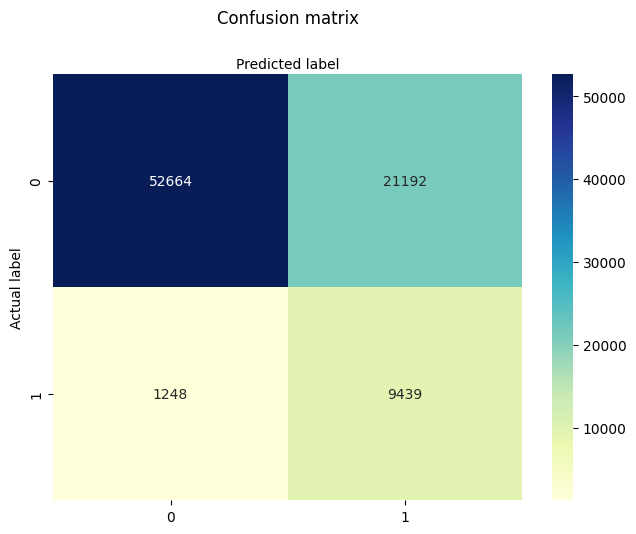

In [80]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=['F','T'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Results:
looks like if we removed neo_id and name won't make much difference in the model performance

# Random Forest
we are going to use Random forest as our second classifier, we will use with all columns first and get the feature importance value of each feature to compare with MI scores

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
# random forest doesn't need scaling as it is non parametric models , there are no weights to be affected with different scales

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [90]:
y_pred = rf.predict(X_test)

# Random Froest Evaluation

Text(0.5, 427.9555555555555, 'Predicted label')

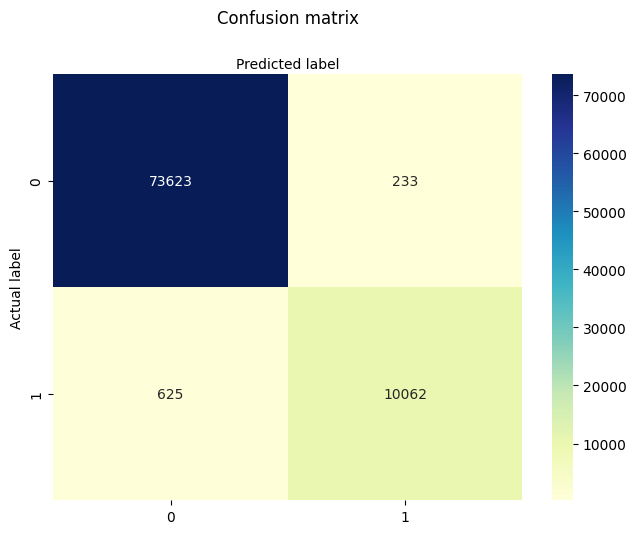

In [91]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=['F','T'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [92]:
print(classification_report(y_test,y_pred, target_names = target_names))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     73856
        True       0.98      0.94      0.96     10687

    accuracy                           0.99     84543
   macro avg       0.98      0.97      0.98     84543
weighted avg       0.99      0.99      0.99     84543



### Random forest performance:
with all columns included we got an interesting performance of 0.94 and 0.98 recall and precision respectively for minorty class(True) and overall accuracy of 0.99

In [93]:
# Overfitting check
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 

y_train_pred_proba = rf.predict_proba(X_train)
y_test_pred_proba = rf.predict_proba(X_test)

train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

print(f"Training Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Check the difference
loss_diff = test_loss - train_loss
print(f"Loss Difference: {loss_diff:.4f}")


Training Loss: 0.0129
Test Loss: 0.0421
Loss Difference: 0.0292


No overfitting as training and test losses are close to each other

# Random forest feature importance VS MI

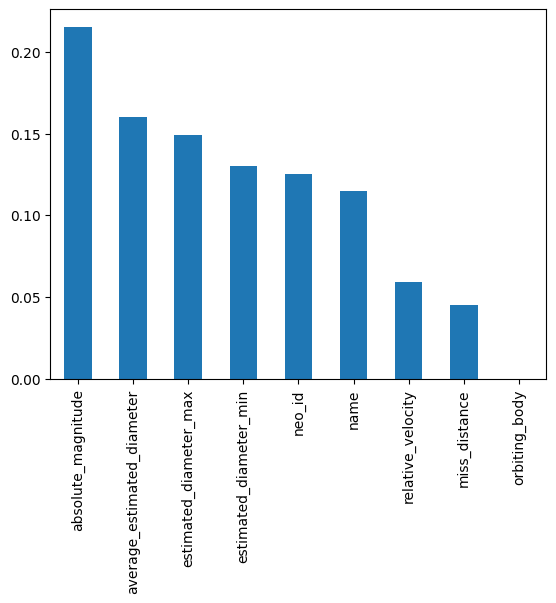

In [88]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

looks like there are indeed hidden relationships between [neo_id,name] and target which make them informative to the model, also in random forest 'absolute_magnitude' is the most important feature on the other hand 'neo_id' was the most informative feature based on MI
Both agreed on orbibting_body hhas no informmation to serve to the model wo we can remove it

ROC AUC Score: 1.00


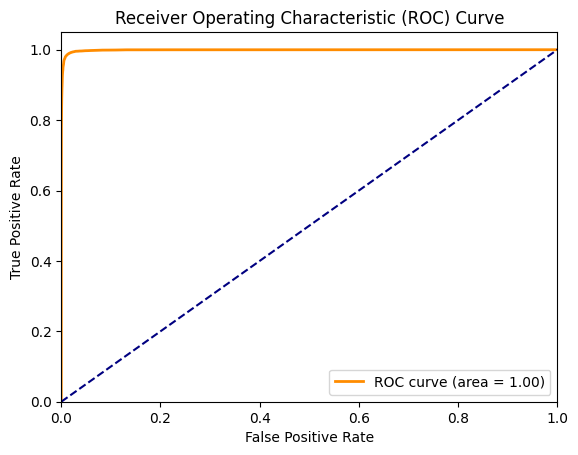

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line representing a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# If you have any questions or comments to improve anything, kindly share it with me